In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn import decomposition

In [16]:
rawdf = pd.read_csv('/Users/dylanzhao/Desktop/Data Science/Data/InsuranceData/insurance_data.csv')
rawdf = rawdf.loc[rawdf.dropna().index]


/var/folders/h7/4g5s0n950bbc47bx6zclk9hm0000gn/T/ipykernel_13673/1201545876.py:18: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



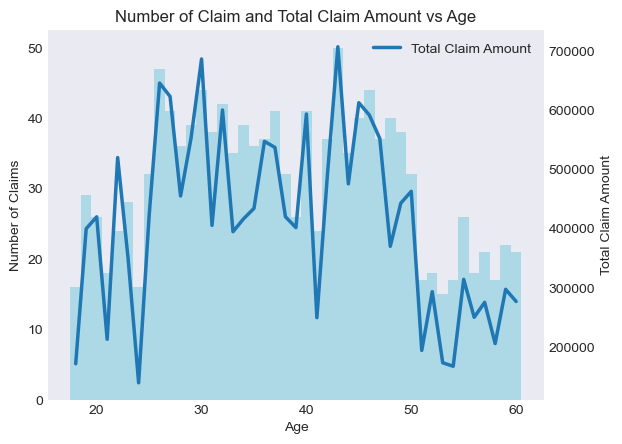

In [17]:
agedistr = rawdf['age'].value_counts()

ages = agedistr.sort_index().index
claimPERage = agedistr.sort_index()
totalclaimAMT = rawdf.groupby('age')['claim'].sum()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(ages, claimPERage, label = 'Number of Claims',color = 'LightBlue', width = 1)
ax1.set_ylabel('Number of Claims')
ax1.set_xlabel('Age')
ax1.grid(False)
ax2.plot(ages, totalclaimAMT, label = 'Total Claim Amount', linewidth = 2.5)
ax2.set_ylabel('Total Claim Amount')
ax2.grid(False)

plt.style.use('seaborn-darkgrid')
plt.title('Number of Claim and Total Claim Amount vs Age')
plt.legend()
plt.plot()
plt.show() 



Text(0.5, 1.0, 'Distribution of claims by gender and region')

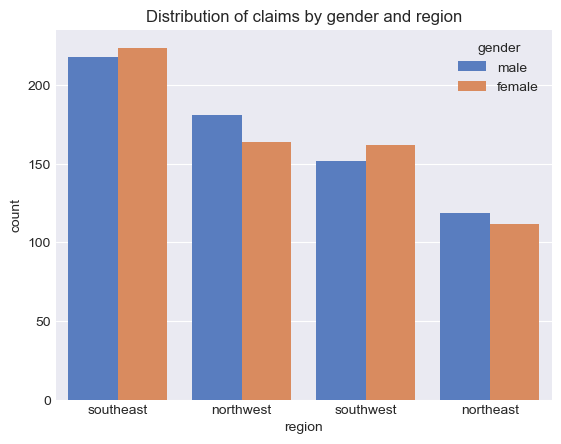

In [18]:
sns.countplot(data = rawdf, x = 'region', hue = 'gender', palette = 'muted')
plt.title('Distribution of claims by gender and region')

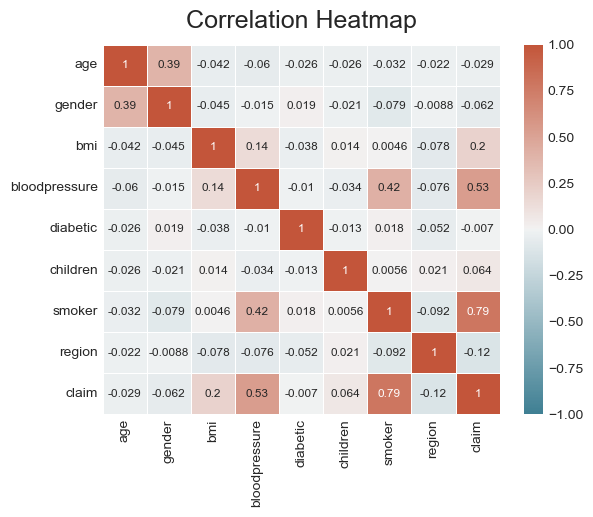

In [19]:
def genderAssign(gender):
    if gender == 'male':
        return 1
    if gender == 'female':
        return 2

def diabeticAssign(diabetic):
    if diabetic == 'Yes':
        return 1
    if diabetic == 'No':
        return 0

def smokerAssign(smoker):
    if smoker == 'Yes':
        return 1
    if smoker == 'No':
        return 0
    
def regionAssign(region):
    if region == 'northeast':
        return 1
    if region == 'southeast':
        return 2
    if region == 'southwest':
        return 3
    if region == 'northwest':
        return 4
    
correlationdf = rawdf.copy()
correlationdf['gender'] = correlationdf['gender'].apply(lambda x: genderAssign(x))
correlationdf['diabetic'] = correlationdf['diabetic'].apply(lambda x: diabeticAssign(x))
correlationdf['smoker'] = correlationdf['smoker'].apply(lambda x: smokerAssign(x))
correlationdf['region'] = correlationdf['region'].apply(lambda x: regionAssign(x))
correlationdf = correlationdf.drop(columns=['index','PatientID'])
heatmap = sns.heatmap(
    correlationdf.corr(),
    vmin=-1, 
    vmax=1, 
    cmap = sns.diverging_palette(220, 20, as_cmap=True),
    annot = True, 
    linewidths = .5, 
    annot_kws={"fontsize":8.5})
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);


Text(0.5, 1.0, 'Correlation Heatmap (Smoker)')

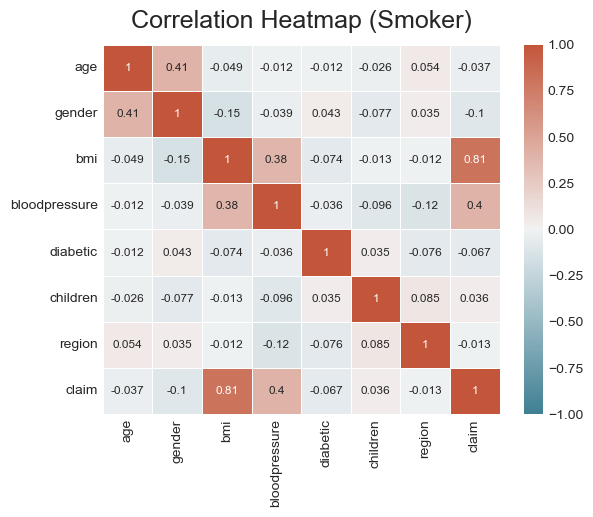

In [20]:
def genderAssign(gender):
    if gender == 'male':
        return 1
    else:
        return 2

def diabeticAssign(diabetic):
    if diabetic == 'Yes':
        return 1
    if diabetic == 'No':
        return 0
    
def regionAssign(region):
    if region == 'northeast':
        return 1
    if region == 'southeast':
        return 2
    if region == 'southwest':
        return 3
    if region == 'northwest':
        return 4

smokerdf = rawdf.copy()
smokerdf['smoker'].astype('string')
filt = smokerdf['smoker'].str.contains('Yes')
pidf = smokerdf.loc[filt]
pidf = pidf.drop(columns=['index','PatientID', 'smoker'])

pidf['gender'] = pidf['gender'].apply(lambda x: genderAssign(x))
pidf['diabetic'] = pidf['diabetic'].apply(lambda x: diabeticAssign(x))
pidf['region'] = pidf['region'].apply(lambda x: regionAssign(x))
heatmap = sns.heatmap(
    pidf.corr(),
    vmin=-1, 
    vmax=1, 
    cmap = sns.diverging_palette(220, 20, as_cmap=True),
    annot = True, 
    linewidths = .5, 
    annot_kws={"fontsize":8.5})
heatmap.set_title('Correlation Heatmap (Smoker)', fontdict={'fontsize':18}, pad=12)

Text(0.5, 1.0, 'Correlation Heatmap (Non-Smoker)')

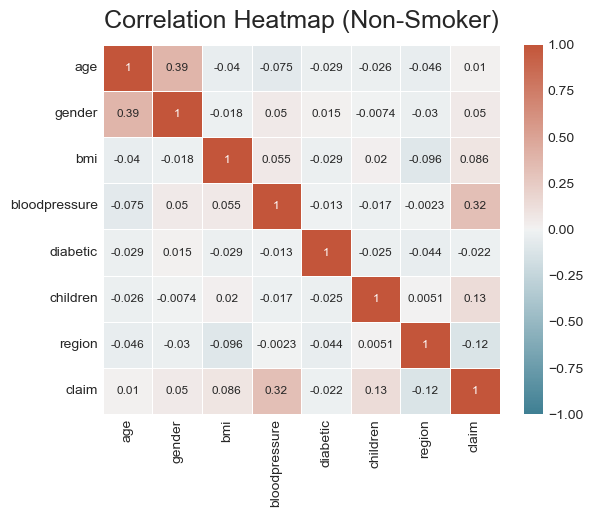

In [21]:
def genderAssign(gender):
    if gender == 'male':
        return 1
    else:
        return 2

def diabeticAssign(diabetic):
    if diabetic == 'Yes':
        return 1
    if diabetic == 'No':
        return 0
    
def regionAssign(region):
    if region == 'northeast':
        return 1
    if region == 'southeast':
        return 2
    if region == 'southwest':
        return 3
    if region == 'northwest':
        return 4

smokerdf = rawdf.copy()
smokerdf['smoker'].astype('string')
filt = smokerdf['smoker'].str.contains('No')
pidf = smokerdf.loc[filt]
pidf = pidf.drop(columns=['index','PatientID', 'smoker'])

pidf['gender'] = pidf['gender'].apply(lambda x: genderAssign(x))
pidf['diabetic'] = pidf['diabetic'].apply(lambda x: diabeticAssign(x))
pidf['region'] = pidf['region'].apply(lambda x: regionAssign(x))
heatmap = sns.heatmap(
    pidf.corr(),
    vmin=-1, 
    vmax=1, 
    cmap = sns.diverging_palette(220, 20, as_cmap=True),
    annot = True, 
    linewidths = .5, 
    annot_kws={"fontsize":8.5})
heatmap.set_title('Correlation Heatmap (Non-Smoker)', fontdict={'fontsize':18}, pad=12)

Linear Regression Model

coefficients:  [ 1.51392098e+01  3.29666099e+02  2.27261083e+02 -1.68102082e+02
  6.65880909e+02  2.13872393e+04 -6.01331914e+02]
Intercept:  -22698.954608574262
Mean Squared Error:  43758134.74830794
R-Squared: 0.680


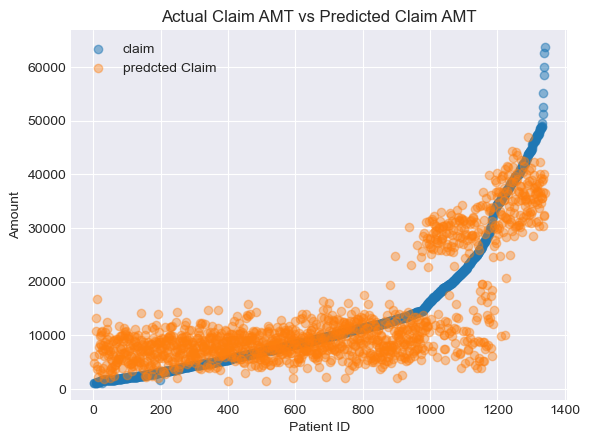

In [22]:
lrdf = rawdf.copy()
lrdf['gender'] = lrdf['gender'].astype('category')
lrdf['gender'] = lrdf['gender'].cat.codes

lrdf['diabetic'] = lrdf['diabetic'].astype('category')
lrdf['diabetic'] = lrdf['diabetic'].cat.codes

lrdf['smoker'] = lrdf['smoker'].astype('category')
lrdf['smoker'] = lrdf['smoker'].cat.codes

lrdf['region'] = lrdf['region'].astype('category')
lrdf['region'] = lrdf['region'].cat.codes

X = lrdf.drop(columns = ['index', 'gender', 'PatientID', 'claim'])
y = lrdf['claim']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .2, random_state= 0)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_test)
print('coefficients: ', lr.coef_)
print('Intercept: ',lr.intercept_)
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred_train))
print('R-Squared: %.3f' %r2_score(y_test,y_pred_train))

lrdf['claimPredict'] = ((lrdf['age']*lr.coef_[0]) + (lrdf['bmi']*lr.coef_[1]) + (lrdf['bloodpressure']*lr.coef_[2]) + (lrdf['diabetic']*lr.coef_[3]) 
+ (lrdf['children']*lr.coef_[4]) + (lrdf['smoker']*lr.coef_[5]) + (lrdf['region']*lr.coef_[6]) - 22698.95)
lrdf['claimPredict'] = lrdf['claimPredict'].round(2)
lrdf

plt.scatter(x = lrdf['PatientID'], y = lrdf['claim'], label = 'claim', alpha = .5)
plt.scatter(x = lrdf['PatientID'], y = lrdf['claimPredict'], label = 'predcted Claim', alpha = .4)
plt.title('Actual Claim AMT vs Predicted Claim AMT')
plt.xlabel('Patient ID')
plt.ylabel('Amount')
plt.legend()
plt.show()

PCA TECHNIQUE

In [23]:
Xvar = X.copy()
Yvar = lrdf['claim']

Xvar = scale(Xvar)

pca = decomposition.PCA(n_components = 3)
pca.fit(Xvar)

scores = pca.transform(Xvar)
scores_df = pd.DataFrame(scores, columns = ['PC1', 'PC2', 'PC3'])

Type = []

Type = pd.DataFrame(Type, columns=['Type'])
df_scores = pd.concat([scores_df,Type], axis = 1)
df_scores['Type'] = 'claim'
df_scores['Type'] = df_scores['Type'].astype('string')
df_scores

,PC1,PC2,PC3,Type
0,-0.799742,-0.938358,0.198364,claim
1,-0.588197,0.435058,-0.005306,claim
2,0.733471,0.990016,0.133769,claim
3,-0.065321,1.163134,0.164288,claim
4,0.834450,2.120918,-0.619793,claim
...,...,...,...,...
1327,1.079229,-0.814428,-0.260564,claim
1328,2.929079,-0.583300,-2.161770,claim
1329,1.340865,-0.193572,1.733103,claim
1330,2.025537,-0.094209,-1.049818,claim


PCA Loadings Value

In [24]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns = ['PC1', 'PC2', 'PC3'], index = ['age','bmi','bloodpressure','diabetic','children','smoker','region'])

loading_label = df_loadings.index
loads3dfig = px.scatter_3d(df_loadings,x='PC1',y='PC2',z='PC3', text = loading_label)

loads3dfig.show()
df_loadings

,PC1,PC2,PC3
age,-0.157890,-0.106396,-0.686804
bmi,0.224477,0.631623,-0.049208
bloodpressure,0.698145,0.011035,-0.087956
diabetic,0.005390,-0.260300,0.552628
children,-0.033640,0.235932,0.459346
smoker,0.658096,-0.183538,-0.037305
region,-0.054987,0.657650,-0.018846


PCA Explained Variance

In [25]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.20822414, 0.16728147, 0.14660832])

Preparing Explained Variance and cumulative variance

In [26]:
explained_variance = np.insert(explained_variance,0,0)
cumulative_variance = np.cumsum(np.round(explained_variance,decimals =3))

pc_df = pd.DataFrame(['','PC1','PC2','PC3'],columns = ['PC'])
explained_variance_df = pd.DataFrame(explained_variance,columns = ['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance,columns = ['Cumulative Variance'])

df_explained_variance = pd.concat([pc_df, explained_variance_df,cumulative_variance_df], axis = 1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.208224,0.208
2,PC2,0.167281,0.375
3,PC3,0.146608,0.522


Visualizing Principle Components

In [27]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size = 15, color = 'LightSeaGreen'),
    )
)
fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color='RoyalBlue')
    )
)
fig.show()

In [28]:
fig3d = px.scatter_3d(df_scores, x='PC1',y='PC2',z='PC3',color = 'Type',opacity = .2)
fig3d.show()